In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [5]:
len(array_Xtest)

96

In [6]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [7]:
len(array_Ytest)

96

In [8]:
model = keras.models.load_model('modelos/paciente2.h5')

In [9]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción del conjunto de pruebas

In [10]:
len(array_Ytest)

96

3/3 [==============================] - 1s 8ms/step


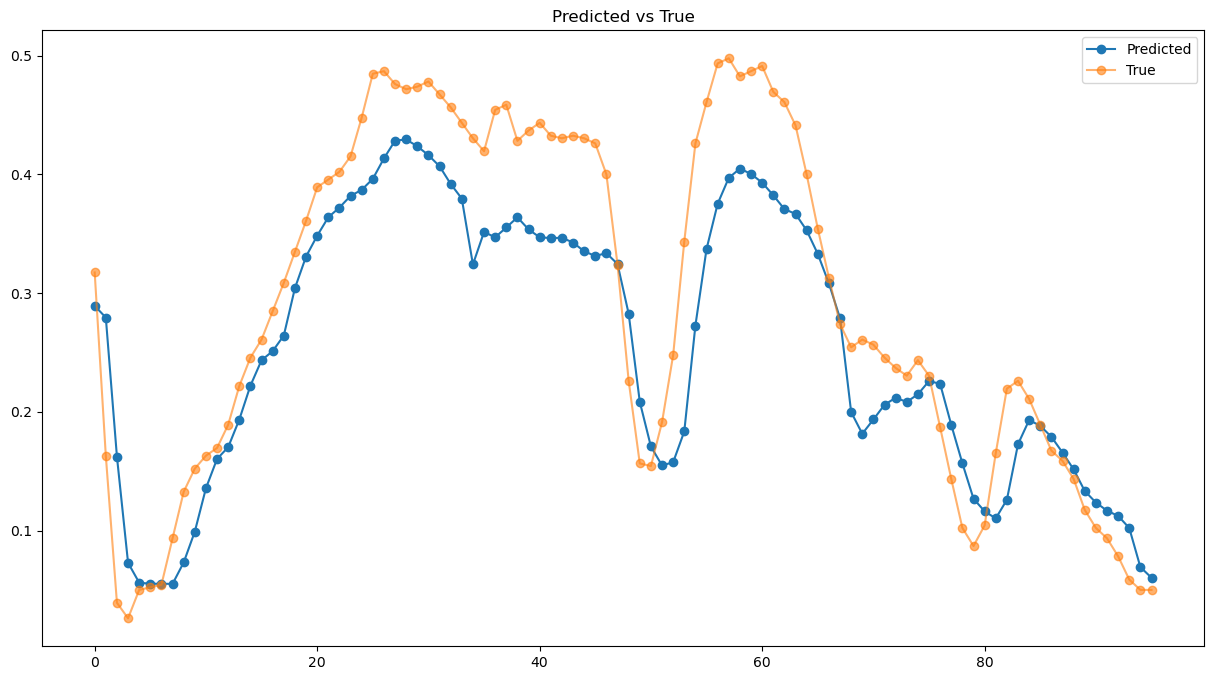

In [11]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [12]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.031538271889642575,
 'mse': 0.04170955669195186,
 'rmse': 0.001739687119439146}

# Predicción a 30 min del conjunto de pruebas

In [12]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [13]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 319ms/step


,Glucose level Predict,Glucose level True
0,0.289288,0.317391
1,0.279429,0.163043


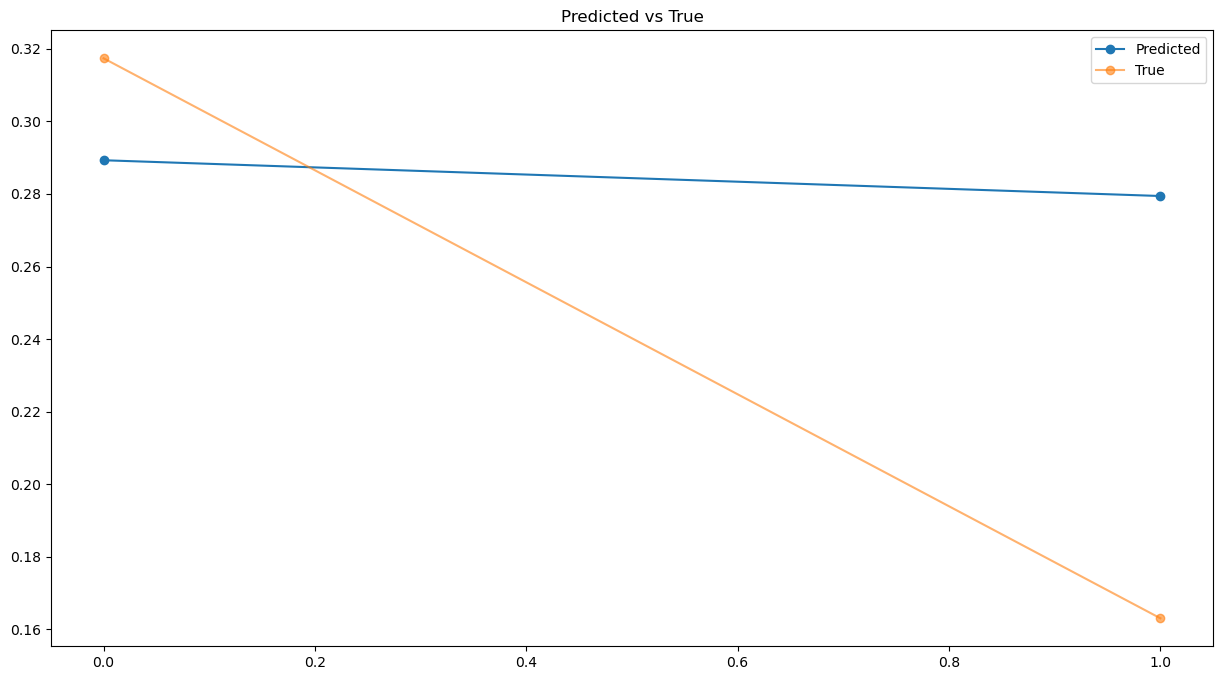

{'mae': 0.07224429599616838,
 'mse': 0.08466198032720902,
 'rmse': 0.007167650912924727}

In [14]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [15]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,173.072403,186.0
1,168.537155,115.0


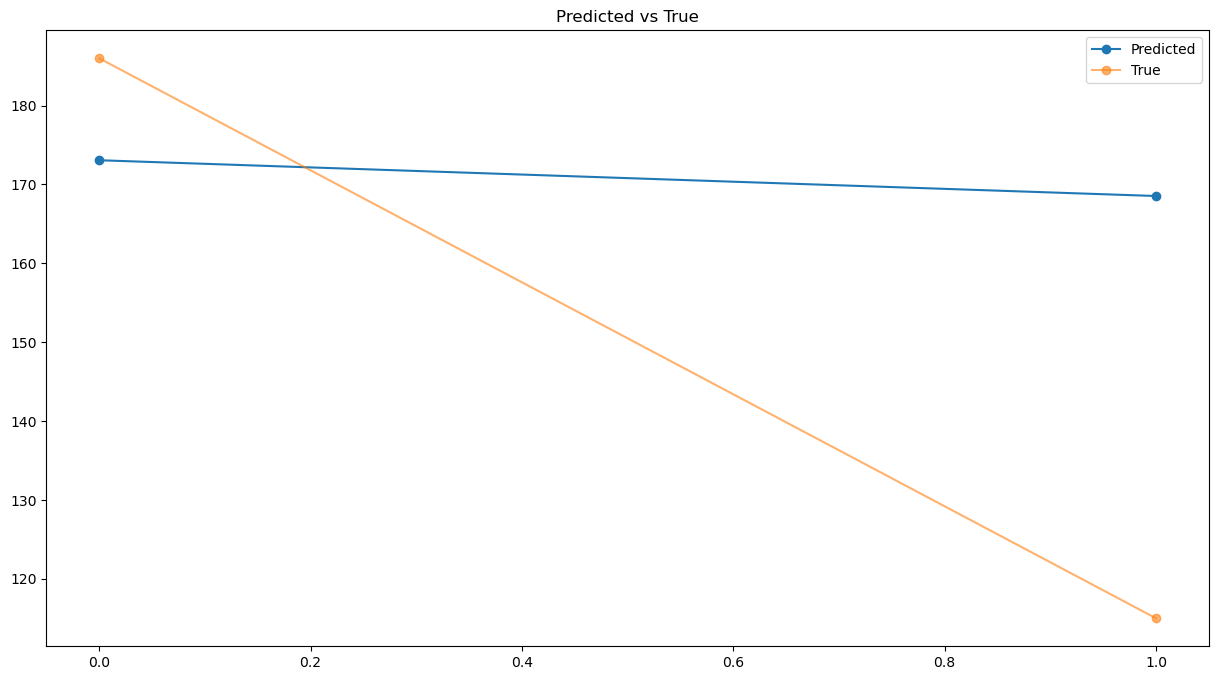

{'mae': 33.23237609863281,
 'mse': 38.944510184894376,
 'rmse': 1516.674873541342}

In [16]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas

In [17]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 50ms/step


,Glucose level Predict,Glucose level True
0,0.289288,0.317391
1,0.264773,0.163043


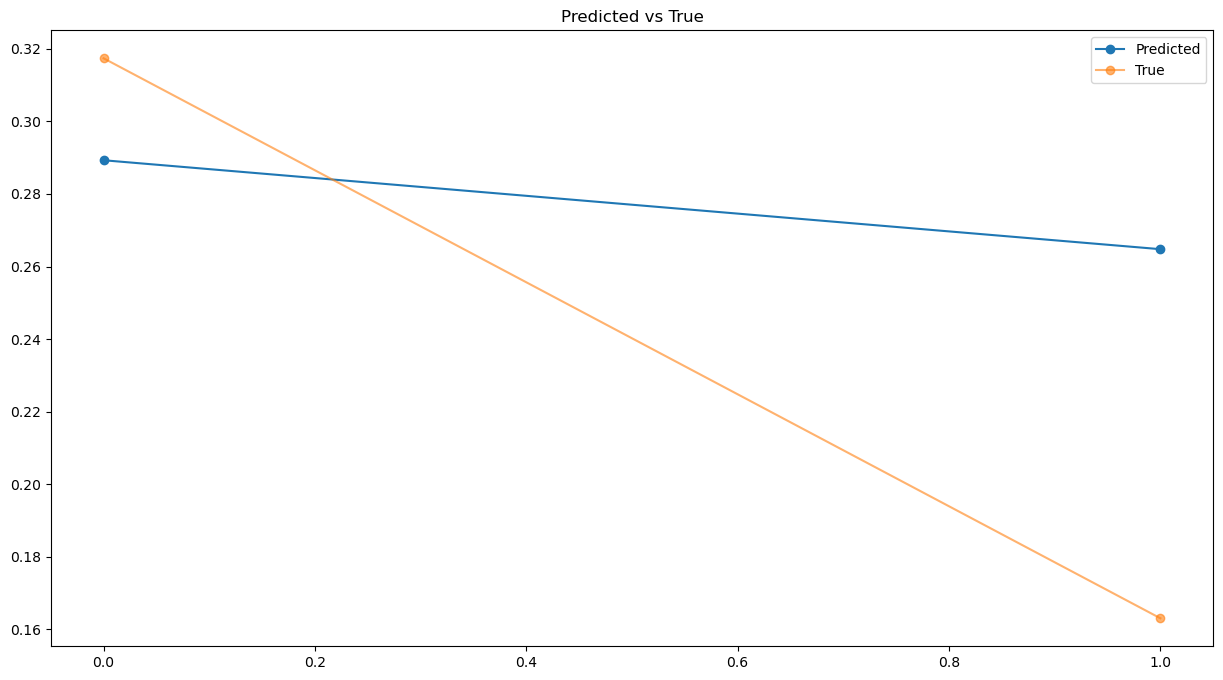

{'mae': 0.06491638175819231,
 'mse': 0.07462791014736272,
 'rmse': 0.005569324972962844}

In [18]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [19]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,173.072388,186.0
1,161.795471,115.0


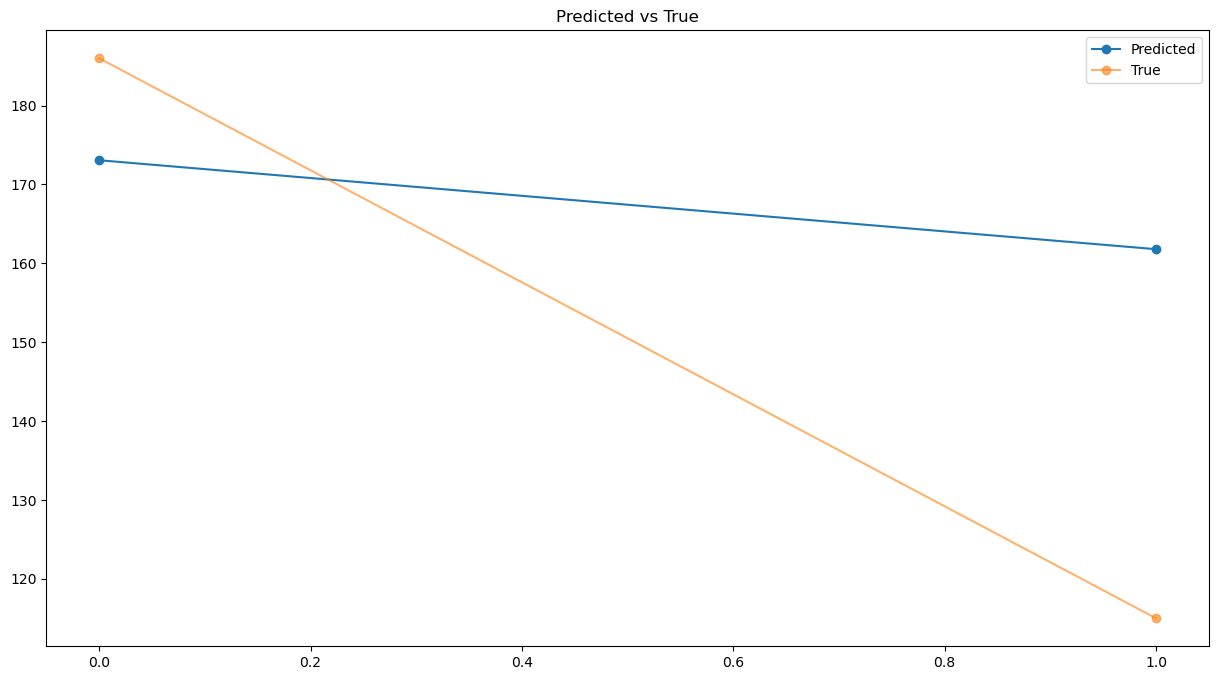

{'mae': 29.861541748046875, 'mse': 34.32884562526127, 'rmse': 1178.46964196302}

In [20]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto eventos del paciente 1

In [21]:
with open('dataset/generado/paciente1/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [22]:
with open('dataset/generado/paciente1/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [23]:
len(X)

25

In [24]:
len(Y)

25

In [25]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [26]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 27ms/step


,Glucose level Predict,Glucose level True
0,0.122138,0.130435
1,0.290929,0.328261
2,0.331651,0.345652
3,0.121086,0.086957
4,0.229093,0.245652


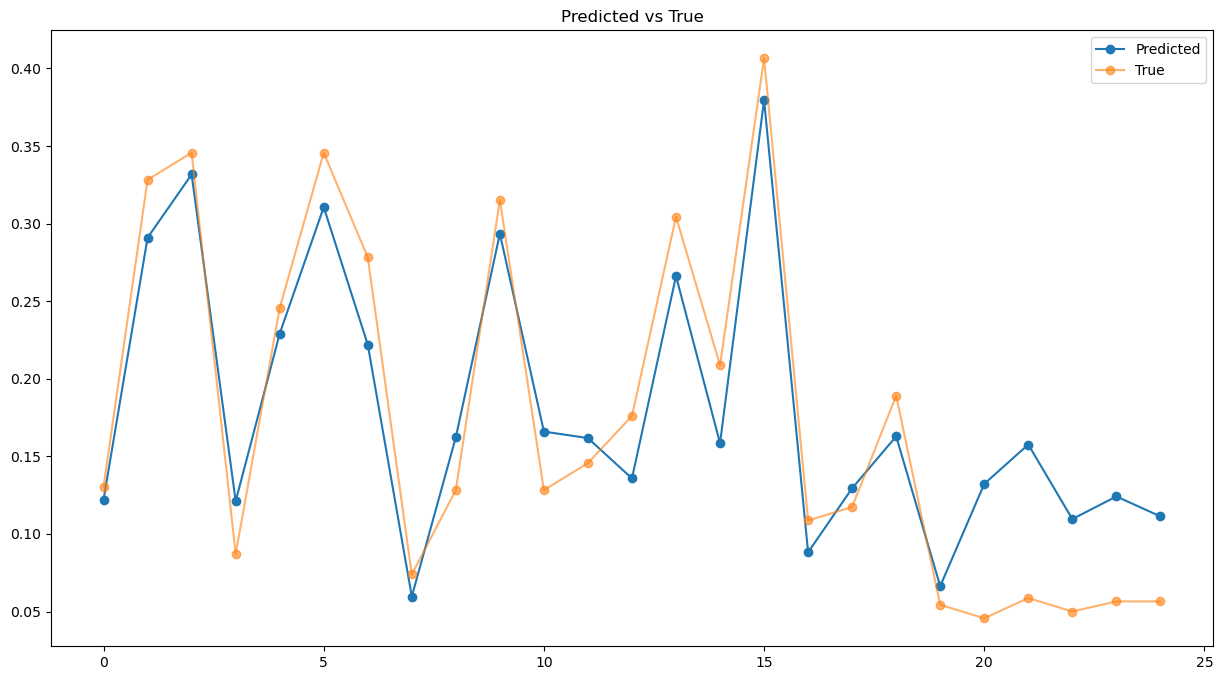

{'mae': 0.03678159317503805,
 'mse': 0.04342924087295334,
 'rmse': 0.0018860989628010011}

In [27]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

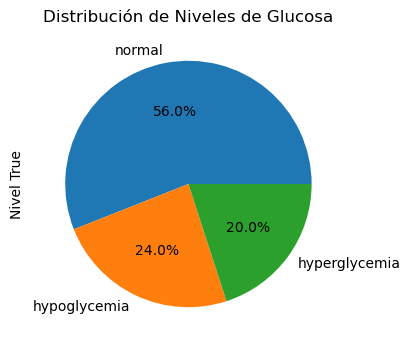

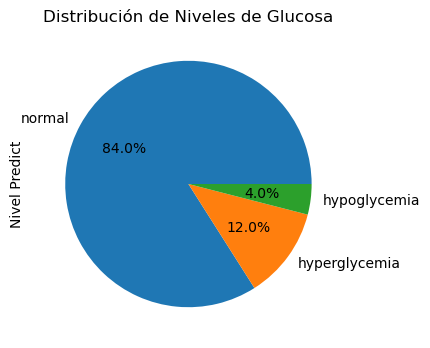

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,96.183266,normal,100.0,normal
1,173.827148,normal,191.0,hyperglycemia
2,192.559555,hyperglycemia,199.0,hyperglycemia
3,95.699524,normal,80.0,normal
4,145.382767,normal,153.0,normal


In [28]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


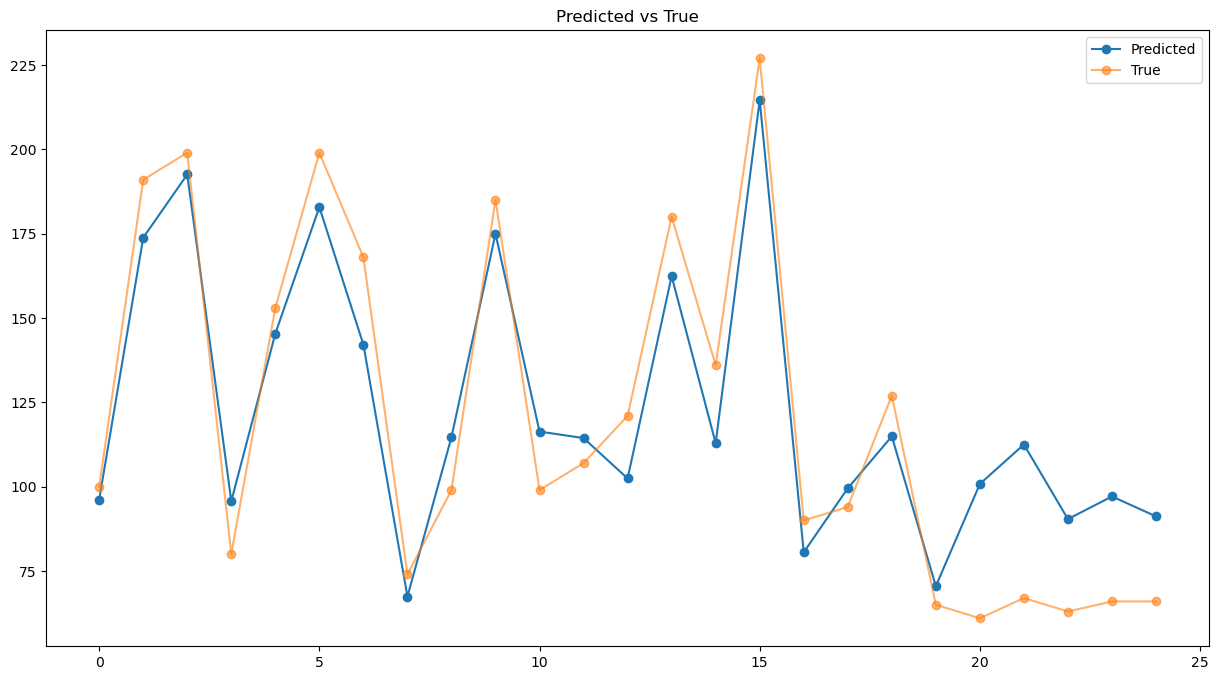

{'mae': 16.919532470703125,
 'mse': 19.97745042922577,
 'rmse': 399.0985256521729}

In [29]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 2

In [30]:
with open('dataset/generado/paciente2/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [31]:
with open('dataset/generado/paciente2/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [32]:
len(X)

0

In [33]:
len(Y)

0

In [34]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

In [ ]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

In [ ]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



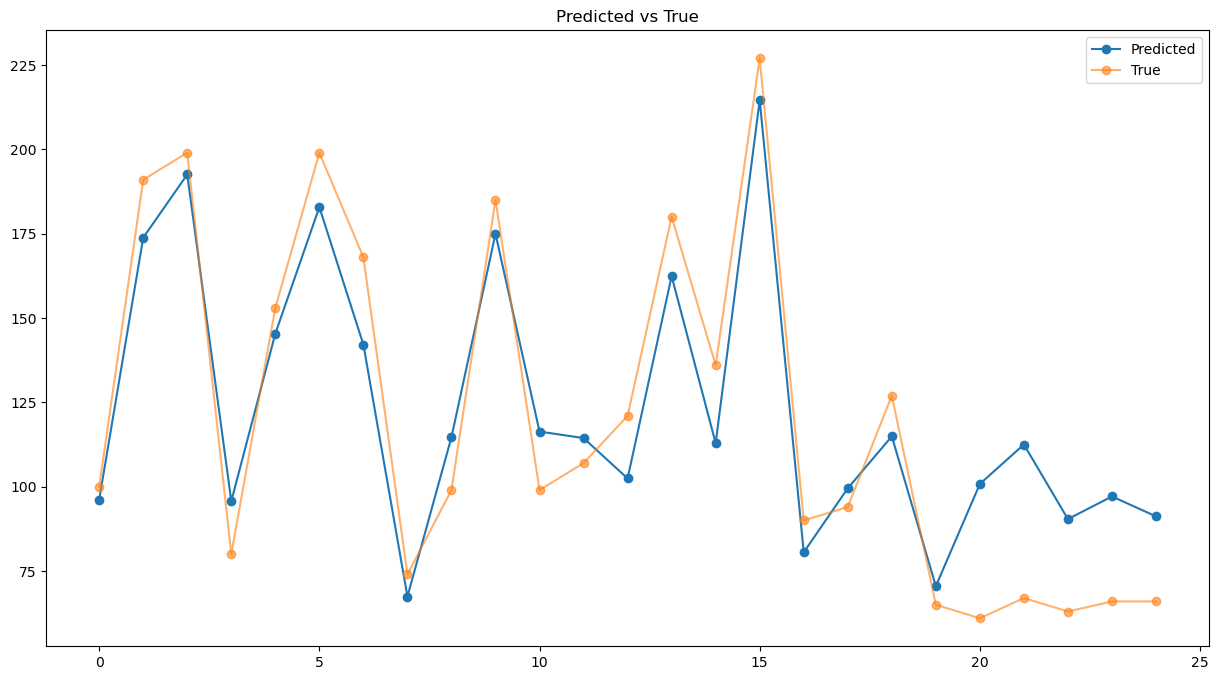

{'mae': 16.919532470703125,
 'mse': 19.97745042922577,
 'rmse': 399.0985256521729}

In [35]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 3

In [36]:
with open('dataset/generado/paciente3/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [37]:
with open('dataset/generado/paciente3/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [38]:
len(X)

24

In [39]:
len(Y)

24

In [40]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True'])

In [41]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 36ms/step


,Glucose level Predict,Glucose level True
0,0.052273,0.030435
1,0.120602,0.165217
2,0.172723,0.208696
3,0.051828,0.028261
4,0.232262,0.223913


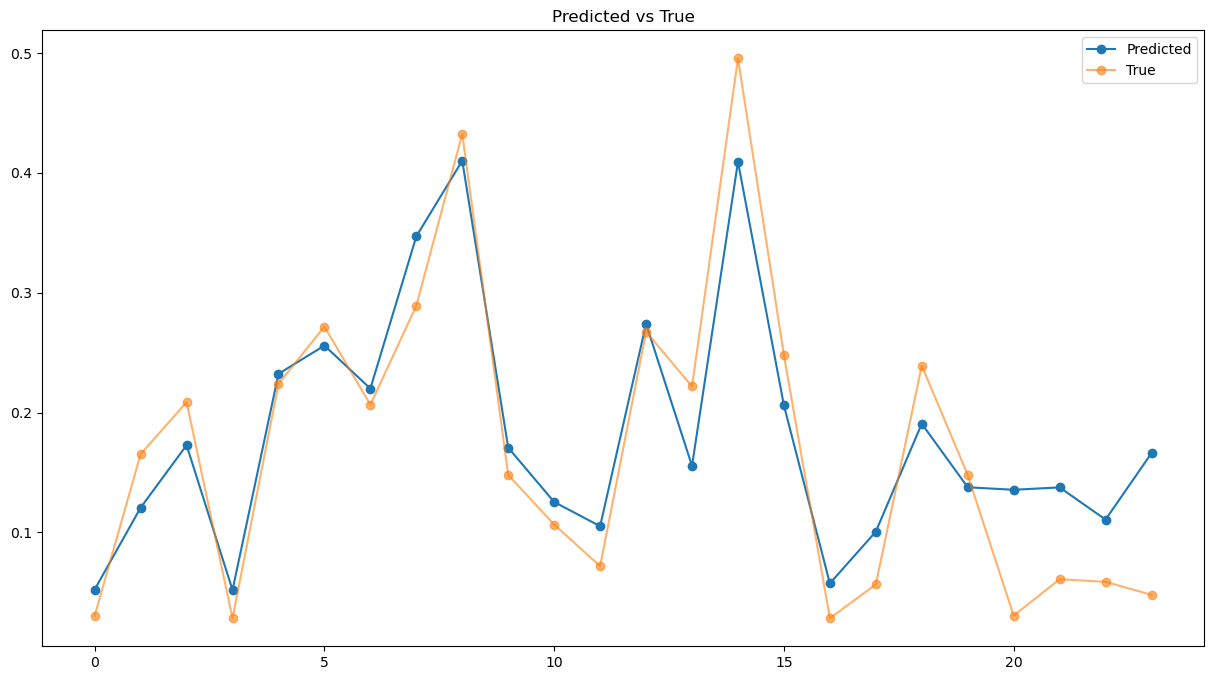

{'mae': 0.04182530832004503,
 'mse': 0.05129406355663792,
 'rmse': 0.0026310809561524103}

In [42]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

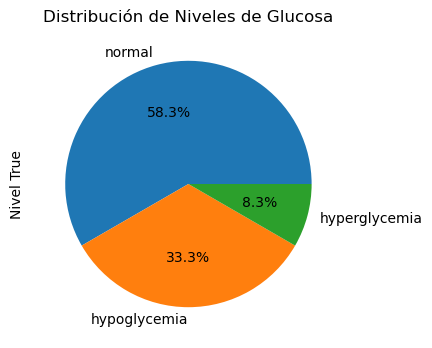

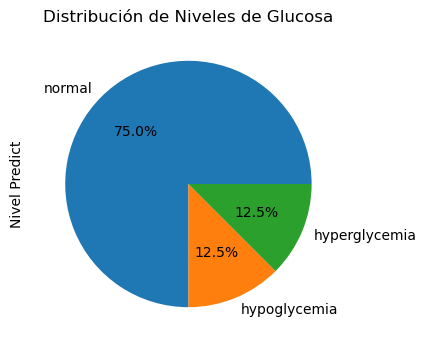

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,64.045525,hypoglycemia,54.0,hypoglycemia
1,95.476875,normal,116.0,normal
2,119.452484,normal,136.0,normal
3,63.841103,hypoglycemia,53.0,hypoglycemia
4,146.840744,normal,143.0,normal


In [43]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



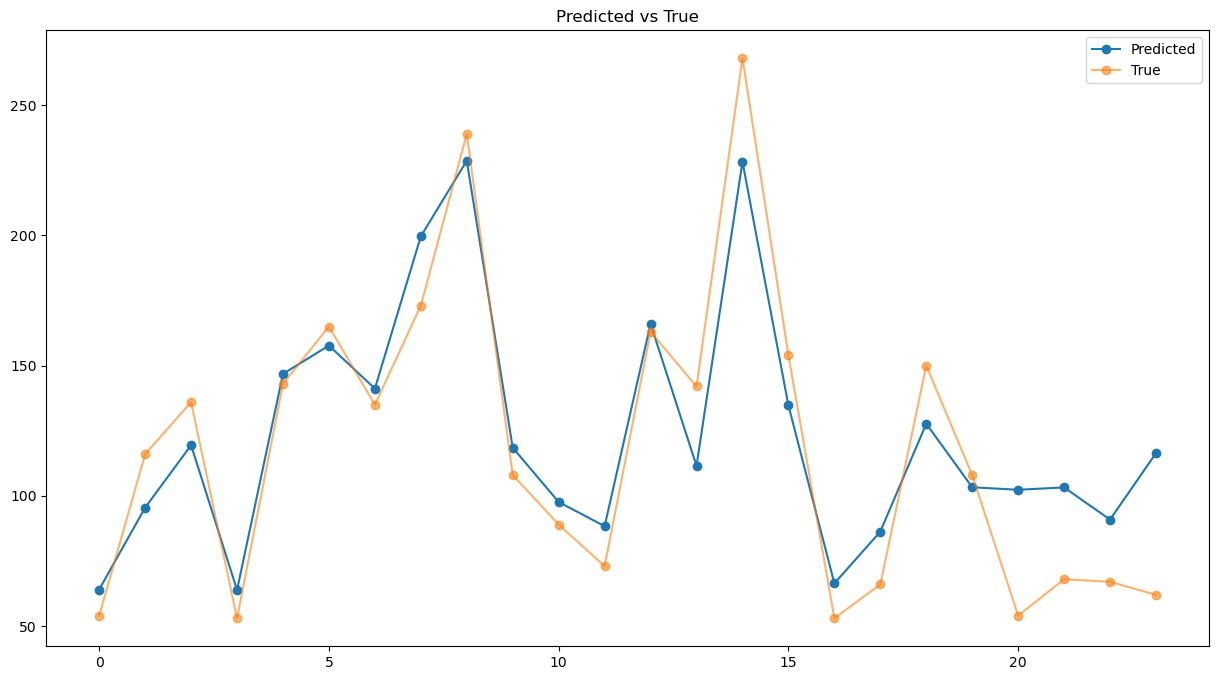

{'mae': 19.23964214324951,
 'mse': 23.595269476477004,
 'rmse': 556.7367416675673}

In [44]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)